## 第四堂作業 梯度下降法
設定不同起始點，以梯度下降法找區域最小值

目標函數如下：

$ f_1(x) = x^3 - 2x + 100$

$ f_2(x) = 2x^4 - 3x^2 + 2x -20$

$ f_3(x) = sin(x) e^{(-0.1*(x-0.6)^2)}$

$ f_4(x) = -5x^2 + 3x + 6$

### 利用sympy 取得一階導數

In [2]:
from sympy import *
import numpy as np
import math
import matplotlib.pyplot as plt

x = Symbol('x')
f1 = x**3 - 2*x + 100 
f2 = 2*x**4 - 3*x**2 + 2*x -20
f3 = sin(x) * np.e ** (-0.1*(x-0.6)**2)
f4 = -5*x**2 + 3*x + 6
print(f1.diff(x))
print(f2.diff(x))
print(f3.diff(x))
print(f4.diff(x))

3*x**2 - 2
8*x**3 - 6*x + 2
(0.12 - 0.2*x)*sin(x)/2.71828182845905**(0.1*(x - 0.6)**2) + cos(x)/2.71828182845905**(0.1*(x - 0.6)**2)
3 - 10*x


### 定義函式其一階導數
$ f_1'(x) = 3x^2 - 2$

$ f_2'(x) = 8x^3 - 6x + 2$

$ f_3'(x) = \frac{(0.12-0.2x)sin(x)}{e^{0.1(x - 0.6)^2}} + \frac{cos(x)}{e^{0.1(x - 0.6)^2}}$

$ f_4'(x) = -10x + 3$

In [3]:
f1 = lambda x: x**3 - 2*x + 100 
f2 = lambda x: 2*x**4 - 3*x**2 + 2*x -20
f3 = lambda x: sin(x) * np.e ** (-0.1*(x-0.6)**2)
f4 = lambda x: -5*x**2 + 3*x + 6
df1 = lambda x: 3*x**2 - 2
df2 = lambda x: 8*x**3 - 6*x + 2
df3 = lambda x: (0.12 - 0.2*x)*np.sin(x)/np.e**(0.1*(x - 0.6)**2) + np.cos(x)/np.e**(0.1*(x - 0.6)**2)
df4 = lambda x: -10*x + 3

### 繪製函數及斜率圖

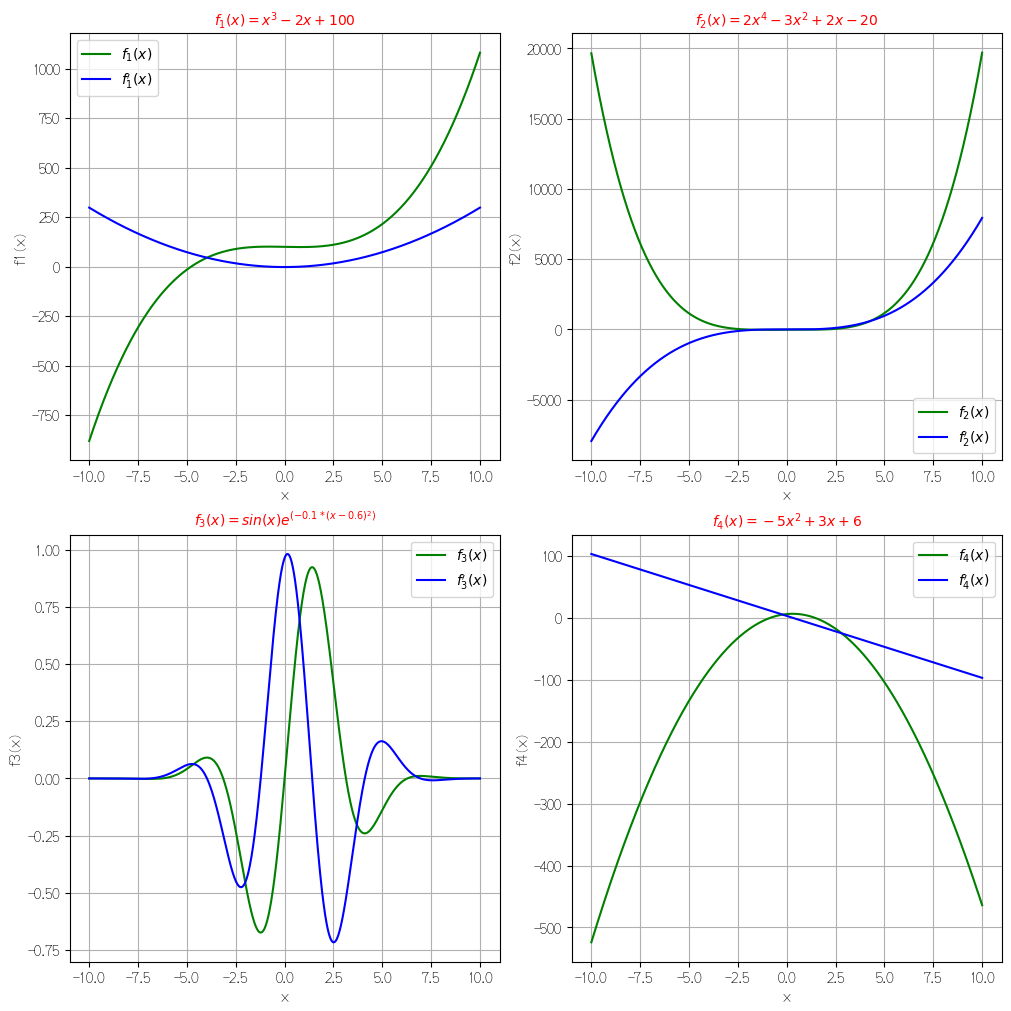

In [4]:
Xmin = -10
Xmax = 10
x = np.linspace(Xmin, Xmax, 1000)
y1 = [f1(i) for i in x]
y2 = [f2(i) for i in x]
y3 = [f3(i) for i in x]
y4 = [f4(i) for i in x]
dy1 = [df1(i) for i in x]
dy2 = [df2(i) for i in x]
dy3 = [df3(i) for i in x]
dy4 = [df4(i) for i in x]
plt.figure(figsize=(10,10),constrained_layout=True)
# plot f1(x)
plt.subplot(221)
plt.plot(x,y1, color='green',label='$f_1(x)$')
plt.plot(x,dy1, color='blue',label="$f_1'(x)$")
plt.title('$ f_1(x) = x^3 - 2x + 100$',{'fontsize':10,'color':'red'})
plt.xlabel('x',{'fontsize':10,'color':'k'})
plt.ylabel('f1(x)',{'fontsize':10,'color':'k'})
plt.grid(True)
plt.legend()
# plot f2(x)
plt.subplot(222)
plt.plot(x,y2, color='green',label='$f_2(x)$')
plt.plot(x,dy2, color='blue',label="$f_2'(x)$")
plt.title('$ f_2(x) = 2x^4 - 3x^2 + 2x -20$',{'fontsize':10,'color':'red'})
plt.xlabel('x',{'fontsize':10,'color':'k'})
plt.ylabel('f2(x)',{'fontsize':10,'color':'k'})
plt.grid(True)
plt.legend()
# plot f3(x)
plt.subplot(223)
plt.plot(x,y3, color='green',label='$f_3(x)$')
plt.plot(x,dy3, color='blue',label="$f_3'(x)$")
plt.title('$ f_3(x) = sin(x) e^{(-0.1*(x-0.6)^2)}$',{'fontsize':10,'color':'red'})
plt.xlabel('x',{'fontsize':10,'color':'k'})
plt.ylabel('f3(x)',{'fontsize':10,'color':'k'})
plt.grid(True)
plt.legend()
# plot f4(x)
plt.subplot(224)
plt.plot(x,y4, color='green',label='$f_4(x)$')
plt.plot(x,dy4, color='blue',label="$f_4'(x)$")
plt.title('$ f_4(x) = -5x^2 + 3x + 6$',{'fontsize':10,'color':'red'})
plt.xlabel('x',{'fontsize':10,'color':'k'})
plt.ylabel('f4(x)',{'fontsize':10,'color':'k'})
plt.grid(True)
plt.legend()

### 梯度下降函式（尋找臨界點）

$f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h} \approx 0$

In [5]:
import inspect
import re
from sympy.calculus.util import minimum, maximum, Interval, stationary_points
from sympy import Symbol
# 梯度下降函數
def gradient_descent(f_func,df,x_init,lr,run_iter,stop_limit):
    try:
        x_hist = []
        df_hist = []
        x = x_init
        df_last = df(x)
        for i in range(run_iter):
            df_value = df(x)
            x_hist.append(x)
            df_hist.append(df_value)

            if abs(df_value) > abs(df_last):
                df_value = -df_value
            x = x - (lr*df_value)
            df_last = df_value
            if abs(df_value) < stop_limit:
                break
        draw_function(f_func,df,x,x_hist,df_hist)
    except:
        print('Inappropriate parameter')
    # return x,x_hist,df_hist

# 獲取 lambda 函數的源碼
def get_function_source(f):
    source_code = inspect.getsource(f)
    # 使用正則表達式提取 lambda 函數的表達式
    expression_match = re.search(r'lambda\s+x\s*:\s*(.+)', source_code)
    expression_string = expression_match.group(1)
    expression_string = 'f(x) = ' + expression_string
    return expression_string
    
# 繪圖函數
def draw_function(f_func,df_func,final_x,x_hist,df_hist):
# def draw_function(f_func):    
    Xmin = -10
    Xmax = 10
    x = np.linspace(Xmin, Xmax, 1000)
    y = [f_func(i) for i in x]
    y_hist = [f_func(i) for i in x_hist]
    plt.figure(figsize=(12,6),constrained_layout=True)
    plt.subplot(121)
    plt.plot(x,y, color='green',label='f(x)')
    plt.scatter(x_hist,y_hist, color='blue',label="gradient",s=5)
    plt.scatter(final_x,f_func(final_x), color='red',s=20)
    plt.title(get_function_source(f_func),{'fontsize':10,'color':'k'})
    plt.xlabel('x',{'fontsize':10,'color':'k'})
    plt.ylabel('f(x)',{'fontsize':10,'color':'k'})

    plt.plot([final_x-2,final_x+2],[f_func(final_x)-(df_func(final_x)),f_func(final_x)+(df_func(final_x))], color='purple')
    plt.grid(True)
    plt.legend()
    plt.subplot(122)
    x1 = [i for i in range(len(df_hist))]
    plt.scatter(x1,df_hist, color='red',label='slope',s=5)
    plt.xlabel('time',{'fontsize':10,'color':'k'})
    plt.ylabel("slope",{'fontsize':10,'color':'k'})
    plt.legend()
    plt.grid(True)
    print(f"Final x = {final_x: .2f}, final f(x) = {f_func(final_x): .2f}, slope = {df_func(final_x): .2e}")
    # plt.show()


# 超參數調整
def hyperparameter_adjustment(f_sel,x_init,lr,run_iter,stop_limit):
    if f_sel == 1:
        gradient_descent(f1,df1,x_init,lr,run_iter,stop_limit)
    elif f_sel == 2:
        gradient_descent(f2,df2,x_init,lr,run_iter,stop_limit)
    elif f_sel == 3:
        gradient_descent(f3,df3,x_init,lr,run_iter,stop_limit)
    elif f_sel == 4:
        gradient_descent(f4,df4,x_init,lr,run_iter,stop_limit)

# 驗證求解最大最小值
def verify_function(f):
    x = Symbol('x')
    source_code = inspect.getsource(f1)
    # 使用正則表達式提取 lambda 函數的表達式
    expression_match = re.search(r'lambda\s+x\s*:\s*(.+)', source_code)
    expression_string = eval(expression_match.group(1))
    ivl = Interval(0,1000)
    minimum(expression_string, x, ivl), stationary_points(expression_string, x, ivl)


$ f_1(x) = x^3 - 2x + 100$ 梯度下降解答

Final x = -0.82, final f(x) =  101.09, slope =  1.15e-05


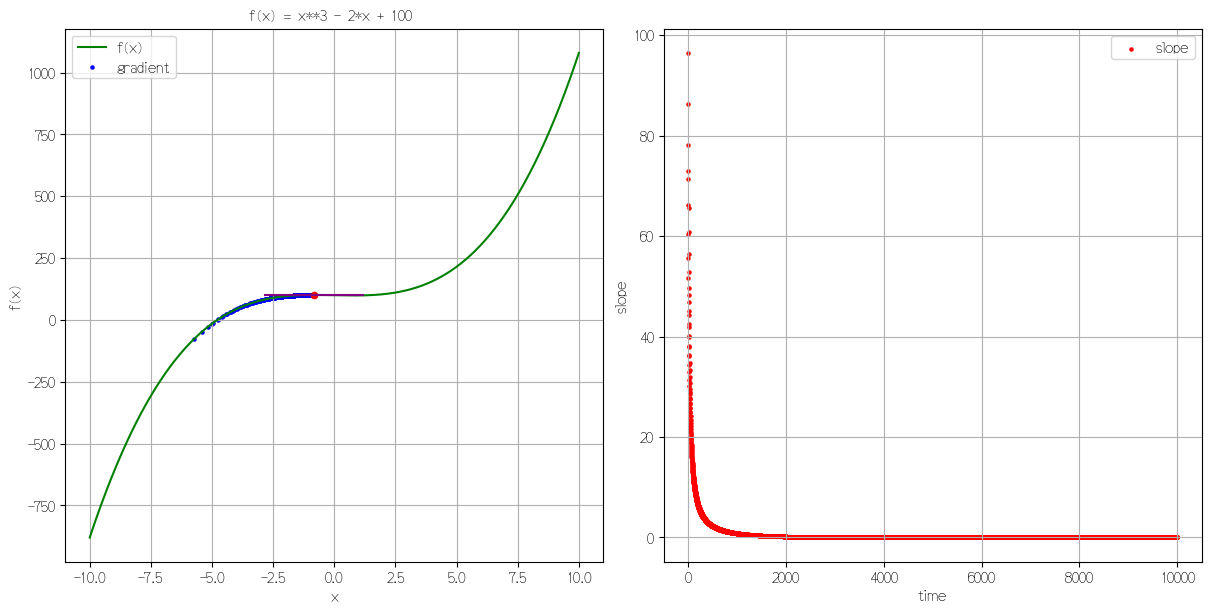

In [6]:
x_init = -5
lr = 0.01
run_iter = 10000
stop_limit = 1e-6
gradient_descent(f1,df1,x_init,lr,run_iter,stop_limit)

$ f_2'(x) = 8x^3 - 6x + 2$ 梯度下降解答

Final x = -1.00, final f(x) = -23.00, slope =  7.98e-07


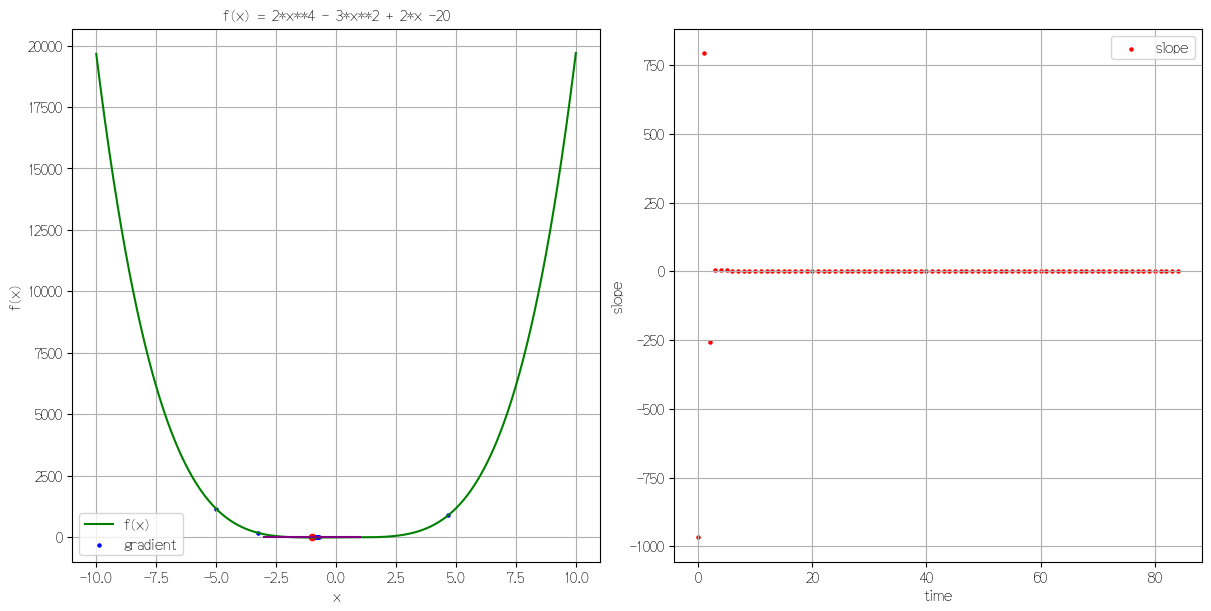

In [7]:
x_init = -5
lr = 0.01
run_iter = 10000
stop_limit = 1e-6
gradient_descent(f2,df2,x_init,lr,run_iter,stop_limit)

$ f_3(x) = sin(x) e^{(-0.1*(x-0.6)^2)}$ 梯度下降解答

Final x = -1.22, final f(x) = -0.67, slope = -9.91e-07


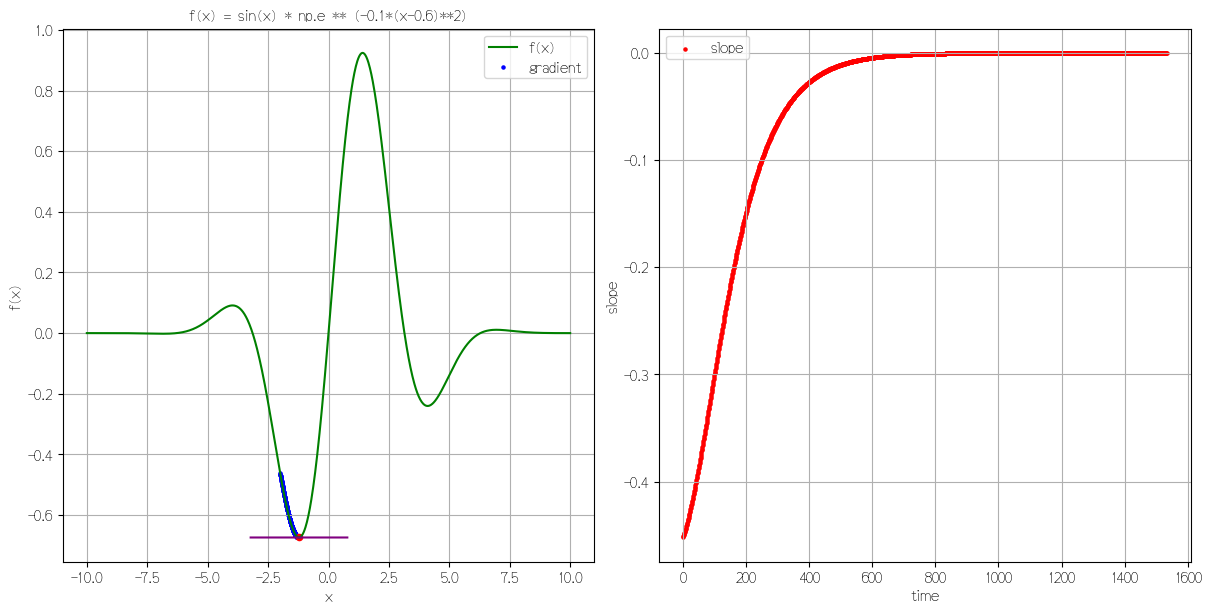

In [8]:
x_init = -2
lr = 0.01
run_iter = 10000
stop_limit = 1e-6
gradient_descent(f3,df3,x_init,lr,run_iter,stop_limit)

$ f_4(x) = -5x^2 + 3x + 6$ 梯度下降解答

Final x =  0.30, final f(x) =  6.45, slope =  1.10e-06


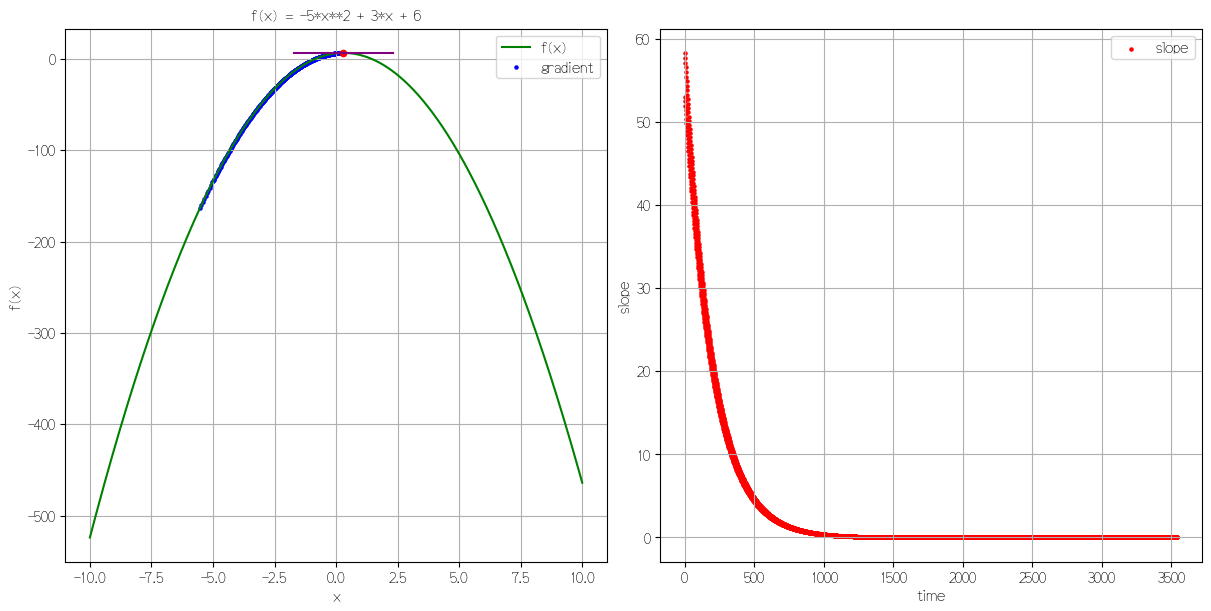

In [9]:
x_init = -5
lr = 0.01
run_iter = 10000
stop_limit = 1e-6
gradient_descent(f4,df4,x_init,lr,run_iter,stop_limit)

### 超參數調整

In [10]:
from ipywidgets import interact
interact(hyperparameter_adjustment, f_sel =(1 , 4, 1), x_init=(-8, 8, 0.1), lr =(0.001 , 0.1, 0.001), run_iter=(1000, 20000, 1000), stop_limit=(1e-4, 1e-1, 1e-4));

interactive(children=(IntSlider(value=2, description='f_sel', max=4, min=1), FloatSlider(value=0.0, descriptio…

Sympy 自帶微積分函數求最大最小值驗證

In [13]:
x = Symbol('x')
source_code = inspect.getsource(f1)
# 使用正則表達式提取 lambda 函數的表達式
expression_match = re.search(r'lambda\s+x\s*:\s*(.+)', source_code)
expression_string = eval(expression_match.group(1))
ivl = Interval(0,10)
print(minimum(expression_string, x, ivl), stationary_points(expression_string, x, ivl))

100 - 4*sqrt(6)/9 {sqrt(6)/3}
